# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime

# Read the dataset

In [2]:
reg_ev_sum = pd.read_csv('https://raw.githubusercontent.com/wingochau/Dissertation/main/ML_registered_vehicle_sum.csv')

In [3]:
elec = pd.read_csv('https://raw.githubusercontent.com/wingochau/Dissertation/main/reg_elec.csv')
gov_parking = pd.read_csv('https://raw.githubusercontent.com/wingochau/Dissertation/main/gov_parking_processed_final.csv')
pub_parking = pd.read_csv('https://raw.githubusercontent.com/wingochau/Dissertation/main/pub_parking_processed_final.csv')
#gov_parking = pd.read_csv('https://raw.githubusercontent.com/wingochau/Dissertation/main/gov_parking_processed_month.csv')

In [4]:
reg_ev_sum['period'] = reg_ev_sum['period'].astype(str)
reg_ev_sum = reg_ev_sum.iloc[0:96, 1:]

In [5]:
reg_ev_sum.head(3)

,EV,PETROL,DIESEL,period
0,292,494222,2291,201301
1,297,495909,2292,201302
2,297,498394,2296,201303


# Plot

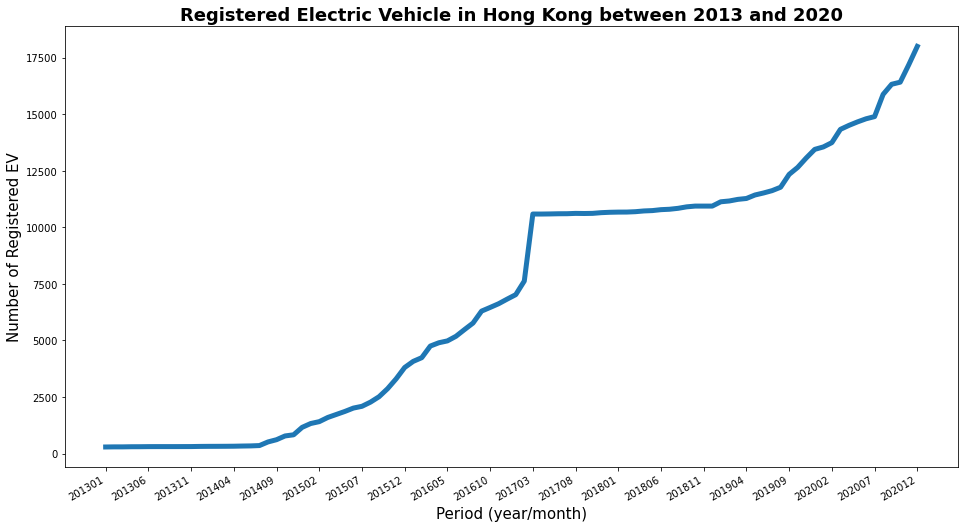

In [6]:
from matplotlib.pyplot import figure
x_ticks = np.arange(0, 96, 5)


fig= plt.figure(figsize=(16,9))
plt.plot(reg_ev_sum['period'],reg_ev_sum['EV'], label = "EV",linewidth=5)
plt.title('Registered Electric Vehicle in Hong Kong between 2013 and 2020', fontweight ="bold", fontsize=18)
plt.xlabel('Period (year/month)', fontsize=15)
plt.ylabel('Number of Registered EV', fontsize=15)
plt.xticks(x_ticks)
plt.gcf().autofmt_xdate()
plt.rcParams.update({'font.size': 15})
plt.rcParams['savefig.facecolor'] = 'w'
plt.savefig('data/sc/Figure6.png', bbox_inches='tight')
plt.show()

# VIF

In [7]:
elec_reg = elec.drop(['All groups'], axis=1)

In [8]:
elec_reg = elec_reg.iloc[:, 0:]
elec_reg

,Unnamed: 0,Domestic,Commercial,Industrial,Street lighting,Exports to the mainland of China
0,516,2675.0,7105.0,826.0,35.0,389.0
1,517,2153.0,6435.0,776.0,32.0,158.0
2,518,2408.0,7746.0,821.0,30.0,317.0
3,519,2342.0,7856.0,940.0,34.0,342.0
4,520,3770.0,9081.0,1023.0,30.0,475.0
...,...,...,...,...,...,...
91,607,5466.0,9754.0,1047.0,29.0,0.0
92,608,5774.0,9063.0,916.0,28.0,0.0
93,609,4007.0,8234.0,805.0,30.0,0.0
94,610,2928.0,7762.0,834.0,32.0,0.0


In [9]:
pub_parking

,Unnamed: 0,HK_pub_UTL_RATE,KLN_pub_UTL_RATE,NT_pub_UTL_RATE,YR_MTH
0,pub_UTL_RATE,40.072366,46.585893,29.149911,201301
1,pub_UTL_RATE,40.105163,44.442349,29.543280,201302
2,pub_UTL_RATE,40.859455,45.805886,29.506165,201303
3,pub_UTL_RATE,40.381441,45.544363,29.061234,201304
4,pub_UTL_RATE,41.200214,46.100825,28.797501,201305
...,...,...,...,...,...
91,pub_UTL_RATE,32.678356,29.760214,30.151253,202008
92,pub_UTL_RATE,34.012029,30.632514,31.078170,202009
93,pub_UTL_RATE,36.055434,31.435855,33.155418,202010
94,pub_UTL_RATE,39.651392,34.564798,35.492288,202011


In [10]:
reg_ev_sum.EV = reg_ev_sum.EV.astype('float64')
reg_ev_sum.PETROL = reg_ev_sum.PETROL.astype('float64')
reg_ev_sum.DIESEL = reg_ev_sum.DIESEL.astype('float64')

In [11]:
len(elec_reg),len(gov_parking),len(pub_parking),len(reg_ev_sum)

(96, 96, 96, 96)

In [12]:
reg_ev_sum['Domestic'] = elec_reg['Domestic'].values
reg_ev_sum['Commercial'] = elec_reg['Commercial'].values
reg_ev_sum['Industrial'] = elec_reg['Industrial'].values
reg_ev_sum['Street lighting'] = elec_reg['Street lighting'].values
reg_ev_sum['Exports to the mainland of China'] = elec_reg['Exports to the mainland of China'].values

reg_ev_sum['Aberdeen_gov_UTL_RATE'] = gov_parking['Aberdeen_gov_UTL_RATE'].values
reg_ev_sum['City_Hall_gov_UTL_RATE'] = gov_parking['City_Hall_gov_UTL_RATE'].values
reg_ev_sum['Kennedy_Town_gov_UTL_RATE'] = gov_parking['Kennedy_Town_gov_UTL_RATE'].values
reg_ev_sum['Kwai_Fong_gov_UTL_RATE'] = gov_parking['Kwai_Fong_gov_UTL_RATE'].values
reg_ev_sum['Rumsey_Street_gov_UTL_RATE'] = gov_parking['Rumsey_Street_gov_UTL_RATE'].values
reg_ev_sum['Shau_Kei_Wan_gov_UTL_RATE'] = gov_parking['Shau_Kei_Wan_gov_UTL_RATE'].values
reg_ev_sum['Sheung_Fung_Street_gov_UTL_RATE'] = gov_parking['Sheung_Fung_Street_gov_UTL_RATE'].values
reg_ev_sum['Star_Ferry_gov_UTL_RATE'] = gov_parking['Star_Ferry_gov_UTL_RATE'].values
reg_ev_sum['Tin_Hau_gov_UTL_RATE'] = gov_parking['Tin_Hau_gov_UTL_RATE'].values
reg_ev_sum['Tsuen_Wan_gov_UTL_RATE'] = gov_parking['Tsuen_Wan_gov_UTL_RATE'].values
reg_ev_sum['Yau_Ma_Tei_gov_UTL_RATE'] = gov_parking['Yau_Ma_Tei_gov_UTL_RATE'].values

reg_ev_sum['HK_pub_UTL_RATE'] = pub_parking['HK_pub_UTL_RATE'].values
reg_ev_sum['KLN_pub_UTL_RATE'] = pub_parking['KLN_pub_UTL_RATE'].values
reg_ev_sum['NT_pub_UTL_RATE'] = pub_parking['NT_pub_UTL_RATE'].values

#reg_ev_sum = reg_ev_sum.fillna(0)
reg_ev_sum = reg_ev_sum.drop(['Exports to the mainland of China'], axis=1)

In [13]:
reg_ev_sum

,EV,PETROL,DIESEL,period,Domestic,Commercial,Industrial,Street lighting,Aberdeen_gov_UTL_RATE,City_Hall_gov_UTL_RATE,...,Rumsey_Street_gov_UTL_RATE,Shau_Kei_Wan_gov_UTL_RATE,Sheung_Fung_Street_gov_UTL_RATE,Star_Ferry_gov_UTL_RATE,Tin_Hau_gov_UTL_RATE,Tsuen_Wan_gov_UTL_RATE,Yau_Ma_Tei_gov_UTL_RATE,HK_pub_UTL_RATE,KLN_pub_UTL_RATE,NT_pub_UTL_RATE
0,292.0,494222.0,2291.0,201301,2675.0,7105.0,826.0,35.0,64.451827,15.151515,...,44.525547,67.454068,67.896679,38.648649,60.798122,42.122720,31.347150,40.072366,46.585893,29.149911
1,297.0,495909.0,2292.0,201302,2153.0,6435.0,776.0,32.0,64.451827,13.333333,...,51.581509,70.078740,71.955720,35.405405,62.441315,45.605307,29.533679,40.105163,44.442349,29.543280
2,297.0,498394.0,2296.0,201303,2408.0,7746.0,821.0,30.0,65.780731,13.939394,...,49.756691,71.653543,69.741697,38.378378,60.563380,47.927032,30.699482,40.859455,45.805886,29.506165
3,303.0,499553.0,2292.0,201304,2342.0,7856.0,940.0,34.0,67.774086,15.151515,...,49.513382,73.753281,70.479705,37.567568,57.746479,47.761194,31.476684,40.381441,45.544363,29.061234
4,304.0,501271.0,2294.0,201305,3770.0,9081.0,1023.0,30.0,68.106312,16.969697,...,51.459854,75.065617,71.217712,40.000000,57.042254,45.771144,33.419689,41.200214,46.100825,28.797501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,15878.0,612808.0,11970.0,202008,5466.0,9754.0,1047.0,29.0,77.474403,27.647059,...,43.473054,79.220779,82.397004,37.400531,68.224299,81.467890,51.948052,32.678356,29.760214,30.151253
92,16324.0,615024.0,11971.0,202009,5774.0,9063.0,916.0,28.0,75.426621,31.764706,...,45.628743,78.441558,79.026217,41.909814,68.691589,82.201835,55.324675,34.012029,30.632514,31.078170
93,16417.0,617320.0,11971.0,202010,4007.0,8234.0,805.0,30.0,76.450512,31.176471,...,36.407186,78.961039,78.651685,42.970822,67.289720,83.853211,51.038961,36.055434,31.435855,33.155418
94,17186.0,618935.0,11970.0,202011,2928.0,7762.0,834.0,32.0,78.498294,32.941176,...,37.964072,79.480519,79.026217,44.827586,69.158879,82.385321,74.545455,39.651392,34.564798,35.492288


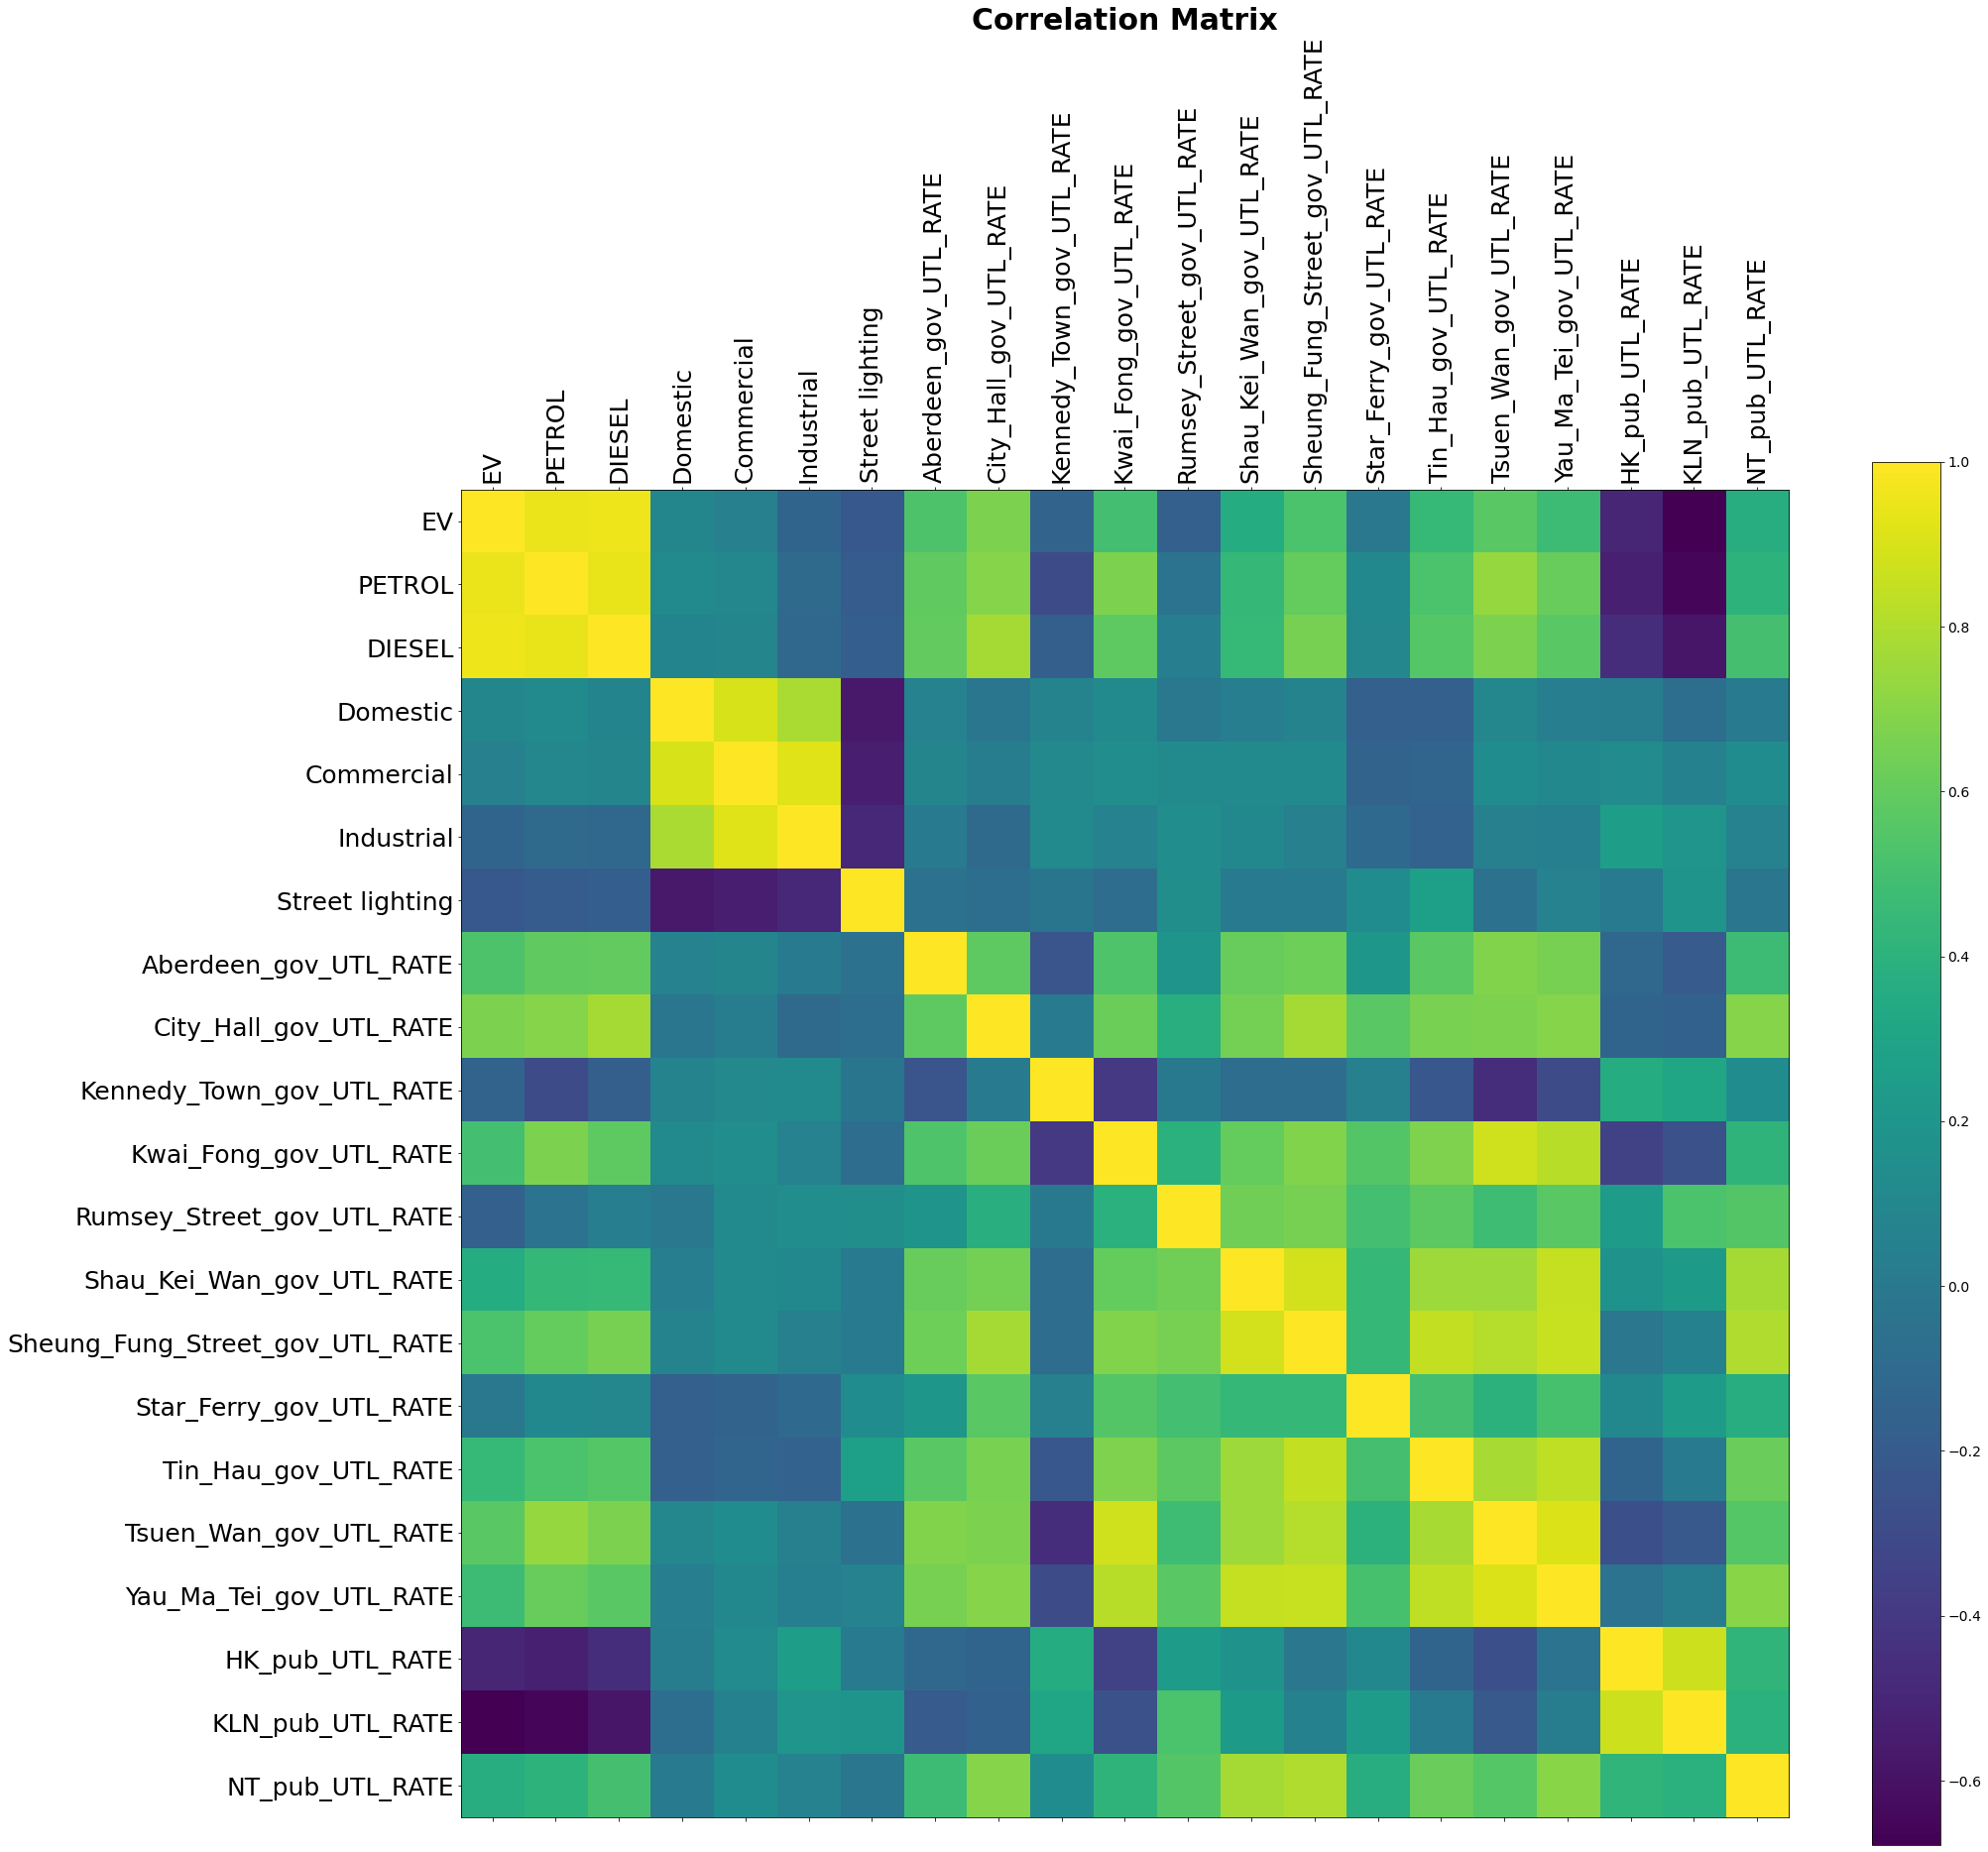

In [14]:
df_co = reg_ev_sum.drop(['period'],axis=1)
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(30, 25))
plt.matshow(df_co.corr(), fignum=f.number)
plt.xticks(range(df_co.shape[1]), df_co.columns, fontsize=25, rotation=90)
plt.yticks(range(df_co.shape[1]), df_co.columns, fontsize=25)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=30,fontweight='bold')
plt.savefig('data/sc/Figure8.png', bbox_inches='tight')

In [15]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [16]:
# using VIF on the vehicle registration dataset
predictors_sui = df_co
response_sui = reg_ev_sum['EV']

list_var_not_to_remove = ['Domestic', 'Commercial', 'Industrial', 'Street lighting']
df_predictors_select_VIF = drop_column_using_vif_(predictors_sui, list_var_not_to_remove, thresh=6)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: 73.12346946933478
Dropping: DIESEL
Max VIF: 55.35518095683232
Dropping: KLN_pub_UTL_RATE
Max VIF: 37.210078174482774
Dropping: PETROL
Max VIF: 19.82437383335386
Dropping: Sheung_Fung_Street_gov_UTL_RATE
Max VIF: 17.922031058598485
Dropping: Tsuen_Wan_gov_UTL_RATE
Max VIF: 12.667427519413678
Dropping: EV
Max VIF: 11.643316434780159
Dropping: Yau_Ma_Tei_gov_UTL_RATE
Max VIF: 10.438389955891937
Dropping: NT_pub_UTL_RATE
Max VIF: 5.435580106315374
The columns remaining after VIF selection are:
Index(['Domestic', 'Commercial', 'Industrial', 'Street lighting',
       'Aberdeen_gov_UTL_RATE', 'City_Hall_gov_UTL_RATE',
       'Kennedy_Town_gov_UTL_RATE', 'Kwai_Fong_gov_UTL_RATE',
       'Rumsey_Street_gov_UTL_RATE', 'Shau_Kei_Wan_gov_UTL_RATE',
       'Star_Ferry_gov_UTL_RATE', 'Tin_Hau_gov_UTL_RATE', 'HK_pub_UTL_RATE'],
      dtype='object')


In [17]:
# Conduct a Linear Regression
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response_sui)

LinearRegression()

In [18]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": df_predictors_select_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  7047.03832385459
                           var        coef
0                     Domestic   -0.173867
1                   Commercial    1.033877
2                   Industrial  -13.052395
3              Street lighting -264.143756
4        Aberdeen_gov_UTL_RATE  -99.707730
5       City_Hall_gov_UTL_RATE  341.671115
6    Kennedy_Town_gov_UTL_RATE   86.324683
7       Kwai_Fong_gov_UTL_RATE   66.696146
8   Rumsey_Street_gov_UTL_RATE -339.935726
9    Shau_Kei_Wan_gov_UTL_RATE  231.933931
10     Star_Ferry_gov_UTL_RATE -276.271767
11        Tin_Hau_gov_UTL_RATE  320.343325
12             HK_pub_UTL_RATE -272.759767


In [19]:
print('R2:')
lr.score(X=df_predictors_select_VIF, y=response_sui)

R2:


0.9110216778391667

In [20]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=response_sui, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EV   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     64.58
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           1.97e-37
Time:                        16:55:38   Log-Likelihood:                -845.43
No. Observations:                  96   AIC:                             1719.
Df Residuals:                      82   BIC:                             1755.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       7047.0383   7676.001      0.918      0.361   -8222.974    2.23e+04
Domestic                      -0.1739      0.400     -0.435      0.665      -0.969       0.621
Commercial                     1.0339      0.622      1.662      0.100      -0.204       2.271
Industrial                   -13.0524      5.483     -2.380      0.020     -23.960      -2.145
Street lighting             -264.1438     97.236     -2.717      0.008    -457.577     -70.711
Aberdeen_gov_UTL_RATE        -99.7077     73.458     -1.357      0.178    -245.840      46.424
City_Hall_gov_UTL_RATE       341.6711     37.170      9.192      0.000     267.729     415.613
Kennedy_Town_gov_UTL_RATE     86.3247     48.549      1.778      0.079     -10.254     182.903
Kwai_Fong_gov_UTL_RATE        66.6961     27.939      2.387      0.019      11.118     122.275
Rumsey_Street_gov_UTL_RATE  -339.9357     37.912     -8.966      0.000    -415.356    -264.516
Shau_Kei_Wan_gov_UTL_RATE    231.9339    106.201      2.184      0.032      20.666     443.202
Star_Ferry_gov_UTL_RATE     -276.2718     41.707     -6.624      0.000    -359.240    -193.303
Tin_Hau_gov_UTL_RATE         320.3433     71.339      4.490      0.000     178.428     462.258
HK_pub_UTL_RATE             -272.7598     78.259     -3.485      0.001    -428.443    -117.077
==============================================================================
Omnibus:                        6.685   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.087
Skew:                          -0.559   Prob(JB):                       0.0477
Kurtosis:                       3.521   Cond. No.                     4.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

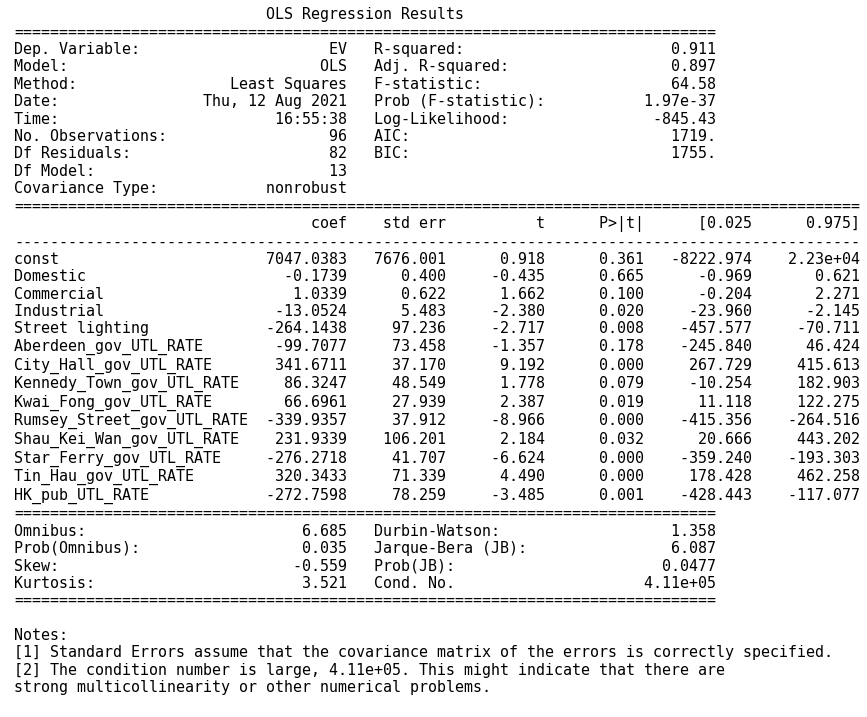

In [21]:
plt.rc('figure', figsize=(20, 7))
plt.text(0.01, 0.05, str(regressor_OLS.summary()), {'fontsize': 15}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.savefig('data/sc/Figure10.png', bbox_inches='tight')

# Machine learning - Regression

In [22]:
# Setting target and dependent
unstd_Y = reg_ev_sum[["City_Hall_gov_UTL_RATE"]].to_numpy()
unstd_X = reg_ev_sum[["EV"]].to_numpy()


In [23]:
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#scaler = StandardScaler()
#X = scaler.fit_transform(unstd_X) 
X = preprocessing.scale(unstd_X)
Y = preprocessing.scale(unstd_Y)

In [24]:
len(X), len(Y)

(96, 96)

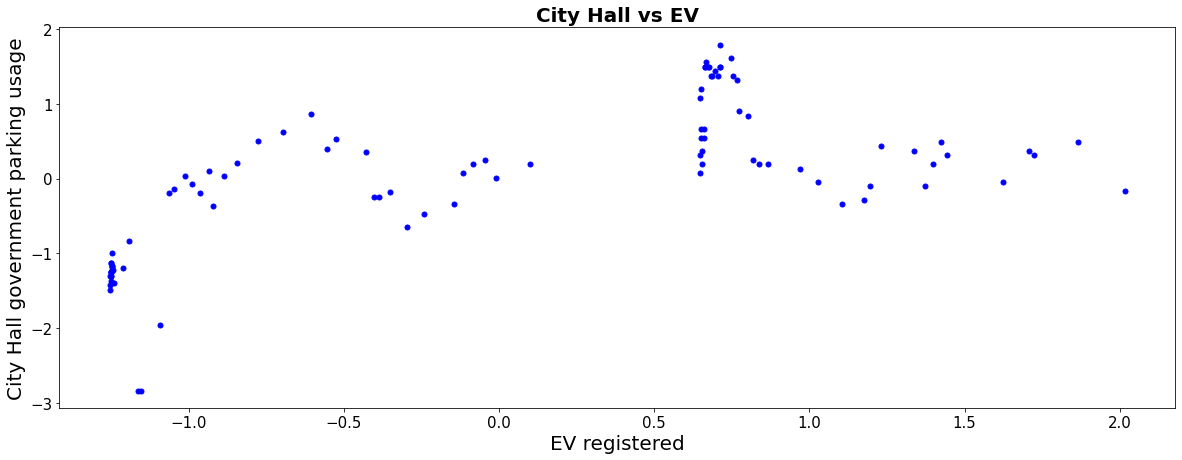

In [25]:
# Plot data
def plot_dist_mod():
    plt.figure(0)
    plt.plot(X, Y, "b.", markersize=10)
    plt.xlabel('EV registered', fontsize=20)
    plt.ylabel('City Hall government parking usage', fontsize=20)
    plt.title('City Hall vs EV', fontsize=20, fontweight ="bold")
    plt.savefig('data/sc/Figure11', bbox_inches='tight')
    plt.rcParams.update({'font.size': 20})
    #plt.ylim(60, 95)
    #plt.xlim(11960, 12000)
    #plt.xlim(565000, 630000)


plot_dist_mod()

In [26]:
def compute_theta_lin_reg(X, y):
    X_b = np.c_[np.ones((m,1)), X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
    return theta

In [27]:
m = 96
theta = compute_theta_lin_reg(X, Y)
(theta_c, theta_m) = theta
#print("Linear regression parameters recovered analytically: intercept={0:.4f}, slope={1:.4f}".format(theta_c, theta_m))

In [28]:
def predict_lin_reg(theta, x):
    X_new_b = np.c_[np.ones((len(x), 1)), x]
    y_predict = X_new_b.dot(theta)
    y = y_predict
    return y

In [29]:
# Look at the lowest and highest number in X
print(min(X), max(X))

[-1.25307641] [2.01550153]


In [30]:
z = np.linspace(-1.253, 2.015, 96)

Y_pred_lin = predict_lin_reg(theta, z)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

(array([2.83364082e-16]), array([[0.67152488]]))

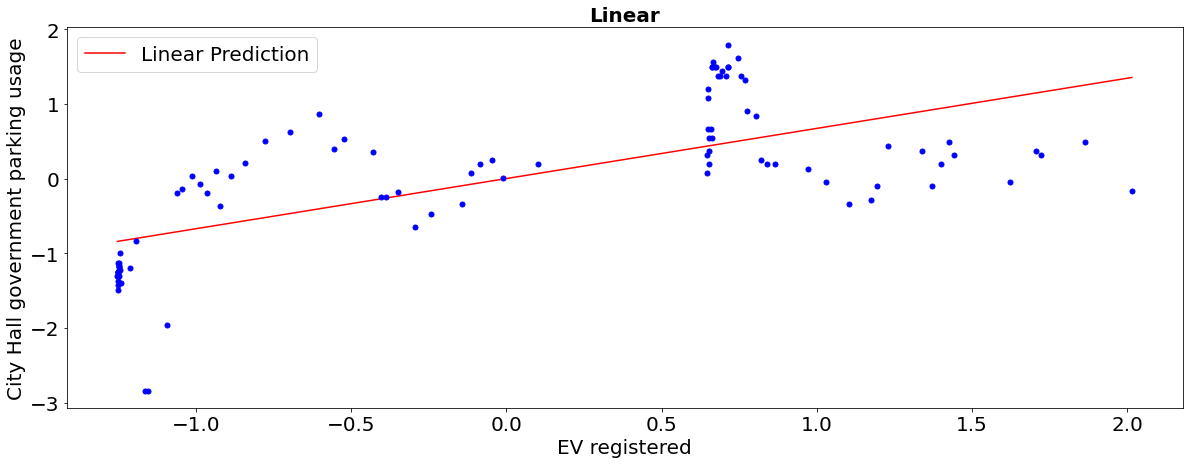

In [31]:
def plot_pred_linear():
    plt.figure(1)
    plt.plot(z, Y_pred_lin, "r-", label="Linear Prediction")
    plt.plot(X, Y, "b.", markersize=10)
    plt.xlabel('EV registered', fontsize=20)
    plt.ylabel('City Hall government parking usage', fontsize=20)
    plt.title('Linear', fontsize=20, fontweight ="bold")
    plt.legend(loc="upper left", fontsize=20)
    plt.savefig('data/sc/Figure12', bbox_inches='tight')
    plt.rcParams.update({'font.size': 20})
    #plt.ylim(7000, 20000)
    #plt.xlim(7600, 13000);
    #plt.xlim(565000, 630000);


plot_pred_linear()

## Over/Under-fitting

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=36)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.figure(figsize=(8,4))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)

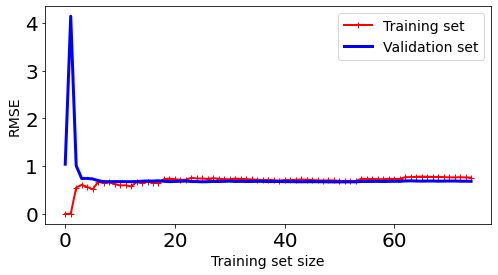

In [33]:
plot_learning_curves(lin_reg, X, Y)
plt.savefig('data/sc/Figure13a', bbox_inches='tight')

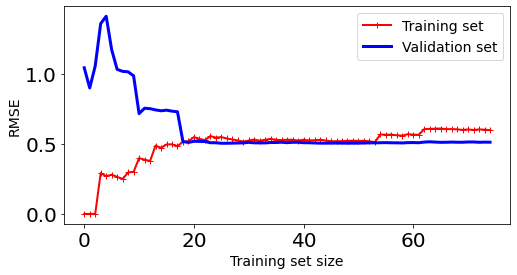

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ))


plot_learning_curves(polynomial_regression, X, Y)
plt.savefig('data/sc/Figure13b', bbox_inches='tight')
#plt.axis([0, 2, 0, 2]);

The linear model appearred an underfitting problem when the training set size increased. With training set size was around 10, the RMSE of the training set was larger than the validation set. If this situation happened, it is likely that the model was badly underfitted the data. In practical, the model will train well in sample, but only has insignificant predictive value when trained out of sample.

Whereas for the polynomial model,

## Polynomial

In [35]:
degree = 20
bias = False

from sklearn.preprocessing import PolynomialFeatures
def compute_poly_features(degree, bias):
    # Return polynomial features of samples and class
    poly_features = PolynomialFeatures(degree=degree, include_bias=bias)
    X_poly = poly_features.fit_transform(X.reshape(-1,1))
    X_sample_poly, poly_features = X.reshape(-1,1)[0], X_poly[0]
    return X_sample_poly, poly_features

X_sample_poly, poly_features = compute_poly_features(degree, bias)
poly_features = PolynomialFeatures(degree=degree, include_bias=bias)
X_poly = poly_features.fit_transform(X.reshape(-1,1))

# Train model
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, Y)
lin_reg_poly.intercept_, lin_reg_poly.coef_

(array([0.4223361]),
 array([[ 8.04603026e-01, -4.85856051e+01, -1.12152404e+02,
          3.51244102e+02,  8.35203113e+02, -1.07442453e+03,
         -2.63500172e+03,  2.06657858e+03,  4.52616414e+03,
         -2.98507771e+03, -4.48782560e+03,  3.16253208e+03,
          2.42321189e+03, -2.15778647e+03, -5.05842642e+02,
          8.02791138e+02, -8.65578653e+01, -1.13665850e+02,
          4.17947414e+01, -4.27438189e+00]]))

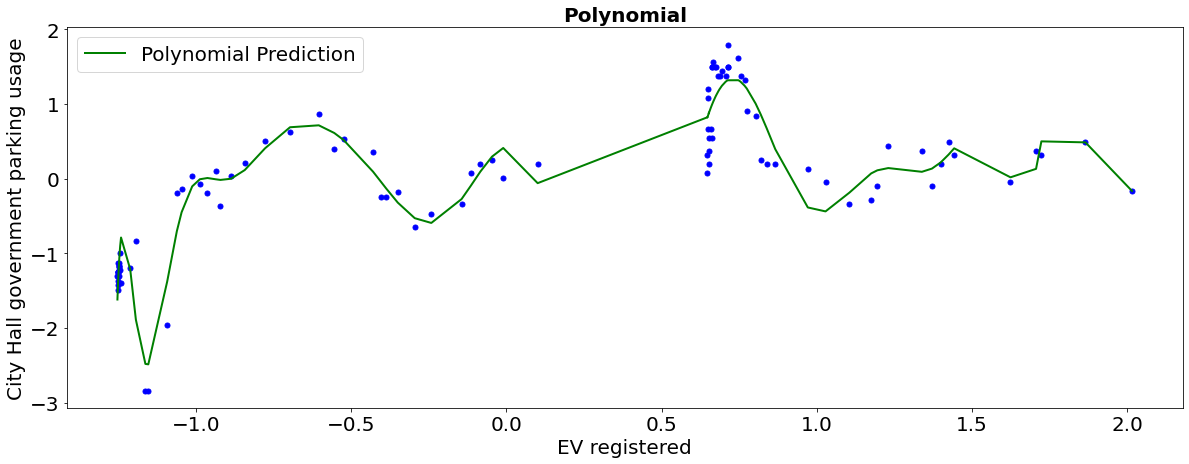

In [36]:
X_new = X.reshape(-1,1)
X_new_poly = poly_features.transform(X_new)
Y_pred_poly = lin_reg_poly.predict(X_new_poly)

def plot_pred_poly():
    plt.figure(2)
    plt.plot(X, Y, "b.", markersize=10)
    plt.plot(X_new, Y_pred_poly, "g-", linewidth=2, label="Polynomial Prediction")
    plt.xlabel('EV registered', fontsize=20)
    plt.ylabel('City Hall government parking usage', fontsize=20)
    plt.title('Polynomial', fontsize=20, fontweight ="bold")
    #plt.ylim(12000, 19000)
    #plt.xlim(11960, 12000)
    #plt.xlim(565000, 630000)
    plt.legend(loc="upper left", fontsize=20)
    plt.rcParams.update({'font.size': 20})
    plt.savefig('data/sc/Figure14', bbox_inches='tight')


plot_pred_poly()

## Optimisation

### Ridge vs Lasso

#### Ridge

In [37]:
from sklearn.linear_model import Ridge

m = 96

def plot_model(model_class, polynomial, alphas, **model_kargs): 
    # Use alpha for regularization parameter (lambda used already)
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline((
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ))
        model.fit(X, Y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\lambda = {}$".format(alpha))
    plt.plot(X, Y, "b.", linewidth=3)
    plt.legend(loc="lower right", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    #plt.axis([0, 3, 0, 4])

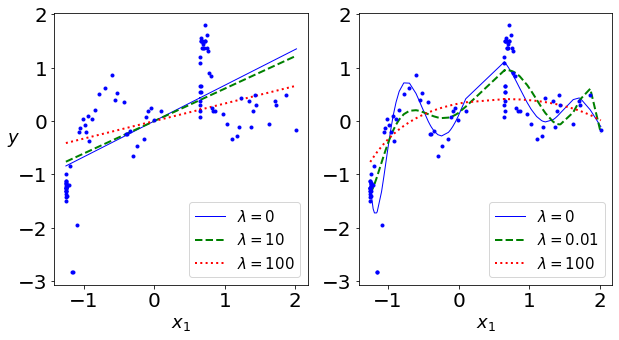

In [38]:
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(10,5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-2, 100), random_state=42)
plt.savefig('data/sc/Figure15a', bbox_inches='tight')

#### Lasso

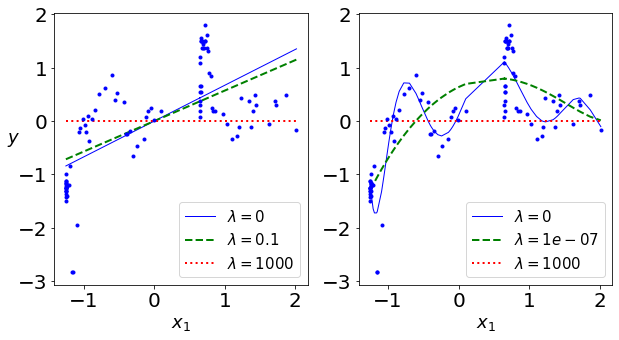

In [39]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 10**-1, 1000), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1000), tol=1, random_state=42)
plt.savefig('data/sc/Figure15b', bbox_inches='tight')

### Optimising by Ridge

In [40]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=10**-2)
ridgereg.fit(X_poly, Y)
Y_pred_poly_improved = ridgereg.predict(X_new_poly)
Y_pred_poly_improved = Y_pred_poly_improved.ravel()

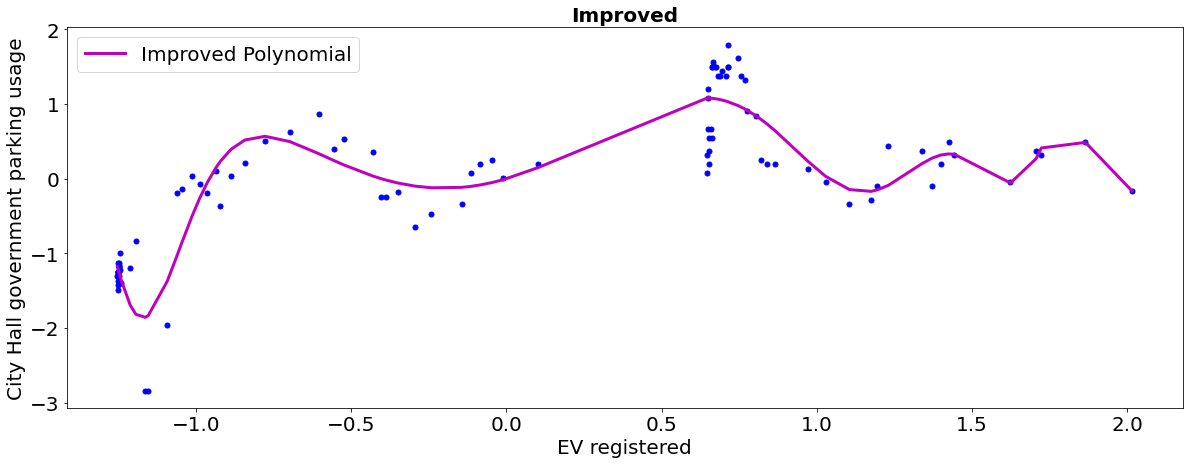

In [41]:
def plot_pred_improved():
    plt.figure(3)
    plt.plot(X, Y, "b.", markersize=10)
    plt.plot(X_new, Y_pred_poly_improved, "m-", linewidth=3, label="Improved Polynomial")
    plt.xlabel('EV registered', fontsize=20)
    plt.ylabel('City Hall government parking usage', fontsize=20)
    plt.title('Improved', fontsize=20, fontweight ="bold")
    plt.legend(loc="upper left", fontsize=20)
    plt.rcParams.update({'font.size': 20})
    #plt.ylim(12000, 19000)
    #plt.xlim(11960, 12000)
    #plt.xlim(600000, 630000)

plot_pred_improved()
plt.savefig('data/sc/Figure16', bbox_inches='tight')

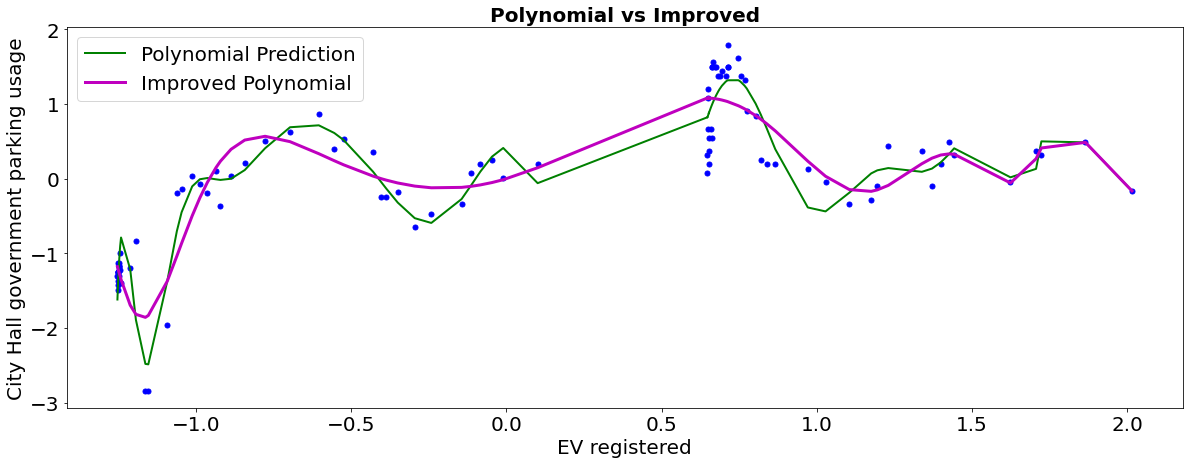

In [42]:
plt.figure()
plt.plot(X, Y, "b.", markersize=10)
plt.plot(X_new, Y_pred_poly, "g-", linewidth=2, label="Polynomial Prediction")
plt.plot(X_new, Y_pred_poly_improved, "m-", linewidth=3, label="Improved Polynomial")
plt.xlabel('EV registered', fontsize=20)
plt.ylabel('City Hall government parking usage', fontsize=20)
plt.title('Polynomial vs Improved', fontsize=20, fontweight ="bold")
plt.legend(loc="upper left", fontsize=20)
plt.rcParams.update({'font.size': 20})
plt.savefig('data/sc/Figure17', bbox_inches='tight')

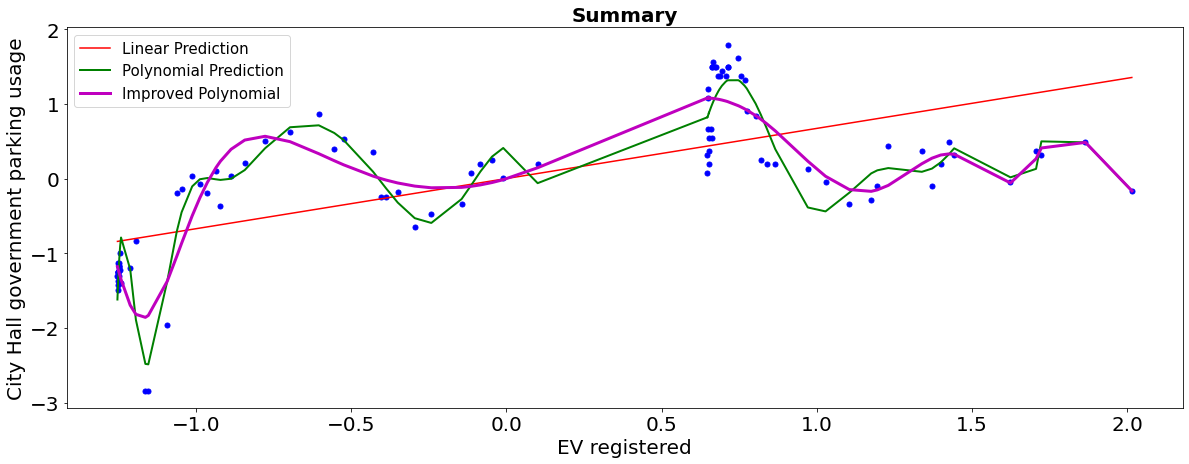

In [43]:
plt.figure()
plt.plot(X, Y, "b.", markersize=10)
plt.plot(z, Y_pred_lin, "r-", label="Linear Prediction")
plt.plot(X_new, Y_pred_poly, "g-", linewidth=2, label="Polynomial Prediction")
plt.plot(X_new, Y_pred_poly_improved, "m-", linewidth=3, label="Improved Polynomial")
plt.xlabel('EV registered', fontsize=20)
plt.ylabel('City Hall government parking usage', fontsize=20)
plt.title('Summary', fontsize=20, fontweight ="bold")
plt.legend(loc="upper left", fontsize=15)
plt.rcParams.update({'font.size': 20})
plt.savefig('data/sc/Figure18', bbox_inches='tight')

For the linear prediction, it shows a less accuracy in terms of the comparison with the actual data. This model contains a larger gap between the predicted points and actual points, too high bias could lead to a potential underfitted issue. It is too regularized and it may only able to provide a general overview and trend of the data. For the polynomial model, it relatively better describes and predicts the shape of the data. The prediction line is followed based on the polynomial features. However, it contains a high level of noises. it could have a overfitting issue as there are too high expected ability of the model to fluctuate (high variance).

In [44]:
# Define a general function to compute the RMS error

def compute_rms(Y_1, Y_2):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    rms = sqrt(mean_squared_error(Y_1, Y_2))
    return rms

In [45]:
# Compute the RMS error between the data and the predictions for each model.

rms_lin = compute_rms(Y, Y_pred_lin)
rms_poly = compute_rms(Y, Y_pred_poly)
rms_poly_improved = compute_rms(Y, Y_pred_poly_improved)

In [46]:
# Print RMS values computed.
print("rms_lin = {0:.4f}".format(rms_lin))
print("rms_poly = {0:.4f}".format(rms_poly))
print("rms_poly_improved = {0:.4f}".format(rms_poly_improved))

rms_lin = 0.7843
rms_poly = 0.3063
rms_poly_improved = 0.4047


The Root Mean Sqaure Error (RMSE) enables to estimate the standard deviation of the distribution of our errors. It measuring the distance between the predicted point and actual point. The lower RMS shows the better fit of the model comparing to the predication.

Among all three modelling, the highest rms is the linear predication method (2.5858), indicating that the distance between predicted and actual values are largely farther than the polynomial approach. A higher variance could affect users to precisely describe the relationship between the electric vehicle registered number and the government parking usage in Kennedy Town. 

The polynomial model helped to drop the RMSE to around 0.3, which allows the predicted point singificantly closer to the actual data. The prediction line was followed based on the polynomial features. However, due to the insufficient data collection, the performance of the polynomial prediction could be affect by a level of noises/ outliers. When more unseen data is being placed in the model, the prediction line is likely to be drawn followed by the data. Consequently, it could have a overfitting issue as there are too high expected ability of the model to fluctuate (high variance).

The improved polynomial model would be the preferable method for prediction, with 0.6314 RMSE. In which, the RSME has approximately four times smaller than the linear model. It demonstrates that the ridge model is more accurate to predict the response and effectively reduce model complexity, further shows its suitabilty on understanding such low dimensional dataset. As lower RMS show the better fit of model, therefore the improved polynomial (Ridge) model is the best for predicting the impact between the electric vehicle registered number and the government parking usage in Kennedy Town.